# DAT240_Section23_Group3

#### **Names**: Aafrin Shehnaz Mohamed Sulaiman, Aiswarya Raghavadesikan, Aryama Ray, Dongmei Han

#### Preprocessing CodeFile

In [ ]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# for colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


We will be merging 2020-2022 consolidated data files. Also we will be adding DATAYEAR field to each of these file to tag them with corresponding year.

In [ ]:

file_path1 = "/content/drive/Shared drives/Data240_Group_Project/Data/2022_2021 Consolidated_File_Section1/2021 Full Year Consolidated Data File.csv"

df1 = pd.read_csv(file_path1)

In [ ]:

df1['DATAYEAR'] = '2021'


In [ ]:
df1.head()

,DUID,PID,DUPERSID,PANEL,FAMID31,FAMID42,FAMID53,FAMID21,FAMIDYR,CPSFAMID,...,RXOTH21,PERWT21F,FAMWT21F,FAMWT21C,SAQWT21F,DIABW21F,SDOHWT21F,VARSTR,VARPSU,DATAYEAR
0,2320005,101,2320005101,23,A,A,A,A,A,A,...,0,6785.015684,7187.249055,7187.249055,0.0,0.0,8941.111966,2079,1,2021
1,2320005,102,2320005102,23,A,A,A,A,A,A,...,0,6176.506584,7187.249055,7187.249055,0.0,0.0,0.000000,2079,1,2021
2,2320006,101,2320006101,23,A,A,A,A,A,A,...,0,1599.364175,1530.856371,1530.856371,0.0,0.0,1990.417108,2028,1,2021
3,2320006,102,2320006102,23,B,B,B,B,B,B,...,0,1649.344739,2314.506726,2314.506726,0.0,0.0,2317.855238,2028,1,2021
4,2320006,103,2320006103,23,A,A,A,A,A,A,...,0,2891.997868,1530.856371,1530.856371,0.0,0.0,2708.864797,2028,1,2021


In [ ]:
## We will check size of the data
df1.shape

(28336, 1489)

In [ ]:
file_path2 = "/content/drive/Shared drives/Data240_Group_Project/Data/2022_2021 Consolidated_File_Section1/2022 Full Year Consolidated Data File.csv"

df2 = pd.read_csv(file_path2)

In [ ]:
df2.head()

,DUID,PID,DUPERSID,PANEL,DATAYEAR,FAMID31,FAMID42,FAMID53,FAMID22,FAMIDYR,...,RXOSR22,RXPTR22,RXOTH22,PERWT22F,FAMWT22F,FAMWT22C,SAQWT22F,DIABW22F,VARSTR,VARPSU
0,2460002,101,2460002101,24,2022,A,A,A,A,A,...,0,0,0,5728.309495,5232.211986,5232.211986,3994.68714,6034.636755,2082,1
1,2460006,101,2460006101,24,2022,A,A,A,A,A,...,0,0,0,15648.881460,16017.881690,16017.881690,0.00000,0.000000,2001,4
2,2460006,102,2460006102,24,2022,A,A,A,A,A,...,0,0,0,14123.720180,16017.881690,12580.731740,0.00000,0.000000,2001,4
3,2460010,101,2460010101,24,2022,A,A,A,A,A,...,0,5288,299,16982.054920,21905.758880,21905.758880,0.00000,0.000000,2038,3
4,2460018,101,2460018101,24,2022,A,A,A,A,A,...,0,10,0,10682.619950,11344.291010,11344.291010,17152.43941,0.000000,2041,1


In [ ]:
df2.shape


(22431, 1420)

In [ ]:
df2['DATAYEAR'] = '2022'

In [ ]:
# Consolidated_File_Section1/2021 Full Year Consolidated Data File.xlsx'
file_path3 = "/content/drive/Shared drives/Data240_Group_Project/Data/2022_2021 Consolidated_File_Section1/2020 Full Year Consolidated Data File.csv"

df3 = pd.read_csv(file_path3)

In [ ]:

df3['DATAYEAR'] = '2020'

 - For merging both the files we will be triming 22 and 21 from column names which are having it at the end of the name

In [ ]:
df1.columns = df1.columns.str.replace(r'21X|22X|21|22', '', regex=True)

In [ ]:
df2.columns = df2.columns.str.replace(r'21X|22X|21|22', '', regex=True)

In [ ]:
df3.columns = df3.columns.str.replace(r'20X|21X|20|21', '', regex=True)

Now we will be merging these files

In [ ]:
# Step 1: Create a mapping to rename columns (without "22X" or "22" suffixes)
column_mapping = {
    "DUID": "Panel_Encrypted_DU_ID",
    "PID": "Person_Number",
    "DUPERSID": "Person_ID",
    "PANEL": "Panel_Number",
    "AGE53X": "Age",
    "DATAYEAR": "Year",
    "SEX": "Sex",
    "WAGEP": "Wage_Income",
    "FAMINC": "Family_Total_Income",
    "HIBPDX": "High_BP_Diagnosis",
    "CHDDX": "Coronary_Hrt_Disease_Diagnosis",
    "ANGIDX": "Angina_Diagnosis",
    "MIDX": "Heart_Attack_Diagnosis",
    "OHRTDX": "Other_Heart_Disease_Diagnosis",
    "STRKDX": "Stroke_Diagnosis",
    "EMPHDX": "Emphysema_Diagnosis",
    "CHOLDX": "High_Cholesterol_Diagnosis",
    "CANCERDX": "Cancer_Diagnosis",
    "ARTHDX": "Arthritis_Diagnosis",
    "DIABDX_M18": "Diabetes_Diagnosis",
    "ASTHDX": "Asthma_Diagnosis",
    "EMPST53H": "Employment_Status",
    # "AFRDCA": "Afford_Med_Care_Flag",
    # "AFRDDN": "Afford_Dental_Care_Flag",
    # "AFRDPM": "Afford_Prescription_Med_Care_Flag",
    "TTLP": "Total_Income",
    "UNEIMP": "Unemployment_Imputation_Flag",
    "UNEMP": "Unemployment_Comp_Income",
    "INSURC": "Insurance_Coverage_Status",
    "UNINS": "Uninsured_Status",
    "TOTEXP": "Total_Health_Care_Expenditure",
    "TOTMCD": "Total_Amt_Paid_Medicaid",
    "TOTMCR": "Total_Amt_Paid_Medicare",
    "TOTOFD": "Total_Amt_Paid_Other_Federal",
    "TOTOSR": "Total_Amt_Paid_Other_Sources",
    "TOTOTH": "Total_Amt_Paid_Other_Combined",
    "TOTPRV": "Total_Amt_Paid_Private_Insurance",
    "TOTPTR": "Total_Amt_Paid_Private_and_Tricare",
    "TOTSLF": "Total_Amt_Paid_Self_Family",
    "TOTSTL": "Total_Amt_Paid_State_Local",
    "TOTTCH": "Total_Health_Care_Charges_Excl_Rx",
    "TOTTRI": "Total_Amt_Paid_Tricare",
    "TOTVA": "Total_Amt_Paid_VA_CHAMPVA",
    "TOTWCP": "Total_Amt_Paid_Workers_Comp",
    "OBTOTV": "Office_Based_Visits",
    "OPTOTV": "Outpatient_Visits",
    "ERTOT": "ER_Visits",
    "IPDIS": "Hospital_Discharges",
    "IPNGTD": "Hospital_Stay_Nights",
    "RXEXP": "Total_Prescription_Expenditure",
    "OBVEXP": "Total_Office_Based_Expenditure",
    "OPTEXP": "Total_Outpatient_Fac_and_Dr_Expenditure",
    "OPFEXP": "Total_Outpatient_Facility_Expenditure",
    "OPDEXP": "Total_Outpatient_Provider_Expenditure",
    "OPVEXP": "Total_Outpatient_Physician_Facility_Expenditure",
    "OPSEXP": "Total_Outpatient_Physician_Dr_Expenditure",
    "ERTEXP": "Total_ER_Facility_and_Dr_Expenditure",
    "ERFEXP": "Total_ER_Facility_Expenditure",
    "ERDEXP": "Total_ER_Dr_Expenditure",
    "IPTEXP": "Total_Inpatient_Hospital_Expenditure",
    "IPFEXP": "Total_Inpatient_Facility_Expenditure",
    "IPDEXP": "Total_Inpatient_Doctor_Expenditure",
    'REGION': "REGION"
}


In [ ]:
# List of original column names based on the mapping
selected_columns = list(column_mapping.keys())

# Display the selected columns list
print(len(selected_columns))

60


In [ ]:
# Concatenate df1 and df2 and df3 based on the selected columns
concatenated_df = pd.concat([df1[selected_columns], df2[selected_columns], df3[selected_columns]], axis=0)

In [ ]:
concatenated_df.shape

(78572, 60)

In [ ]:
concatenated_df.head()

,DUID,PID,DUPERSID,PANEL,AGE53X,DATAYEAR,SEX,WAGEP,FAMINC,HIBPDX,...,OPDEXP,OPVEXP,OPSEXP,ERTEXP,ERFEXP,ERDEXP,IPTEXP,IPFEXP,IPDEXP,REGION
0,2320005,101,2320005101,23,74,2021,2,0,23980,2,...,0,0,0,0,0,0,0,0,0,1
1,2320005,102,2320005102,23,85,2021,1,0,23980,1,...,0,0,0,0,0,0,20933,20234,699,1
2,2320006,101,2320006101,23,48,2021,2,3360,19570,2,...,0,0,0,0,0,0,0,0,0,3
3,2320006,102,2320006102,23,23,2021,1,16320,16320,2,...,0,0,0,0,0,0,0,0,0,3
4,2320006,103,2320006103,23,22,2021,1,0,19570,2,...,0,0,0,0,0,0,0,0,0,3


For this project we will be performing analysis on South US region(region=3) data. Here we will filter out merged data based on Region=3

In [ ]:
filtered_df = concatenated_df[concatenated_df['REGION'] == 3]
#filtered_df = concatenated_df[concatenated_df['REGION'].isin([3, 4])]


In [ ]:
filtered_df.shape

(29874, 60)

In [ ]:
## We will filter out the data based on Chronical diseases only


“Inapplicable” (-1)

“Cannot be Computed” (-15)

REFUSED	Question was asked and respondent refused to answer question (-7)

DETERMINED IN PREVIOUS ROUND (-2)

Question was asked and respondent did not know answer or the information could not be ascertained (-8)

### We will be filtering and keeping the records which will be having  value 1 in any of these variables.


Priority Condition Variables (HIBPDX-ADHDAGED)
high blood pressure (HIBPAGED)
CHDDX - asked if the person had ever been diagnosed as having coronary heart disease

ANGIDX - asked if the person had ever been diagnosed as having angina, or angina pectoris

MIDX - asked if the person had ever been diagnosed as having a heart attack, or myocardial infarction

OHRTDX - asked if the person had ever been diagnosed with any other kind of heart disease or condition


STRKDX asked if the person (aged 18 or older) had ever been diagnosed as having had a stroke or transient ischemic attack (TIA or ministroke).

Emphysema

EMPHDX asked if the person (aged 18 or older) had ever been diagnosed with emphysema. Persons aged 17 or younger were coded as “Inapplicable” (-1). The age of diagnosis for emphysema (EMPHAGED) is included in this file. This variable is top-coded to 85 years of age.

Chronic Bronchitis [NA]

CHBRON31 asked if the person (aged 18 or older) has had chronic bronchitis in the last 12 months. Persons aged 17 or younger were coded as “Inapplicable” (-1).

High Cholesterol

CHOLDX ascertained whether the person had ever been diagnosed as having high cholesterol. The age of diagnosis for high cholesterol (CHOLAGED) is included in this file.
Cancer

CANCERDX ascertained whether the person had ever been diagnosed as having cancer or a malignancy of any kind.


Diabetes

Prior to 2018, diabetes diagnosis was asked for each person aged 18 or older. Beginning in 2018, DIABDX_M18 replaces DIABDX where diabetes is now asked for all ages. DIABDX_M18 indicates whether each person had ever been diagnosed with diabetes (excluding gestational diabetes).



In [ ]:
#HIBPDX =>> if the person ever diagonsed with high blood pressure
filtered_df.HIBPDX.unique()

array([  2,  -1,   1, -15,  -7,  -8])

In [ ]:
#CHDDX =>> if the person ever diagnosed with coronary heart disease
filtered_df.CHDDX.unique()

array([  2,  -1,   1, -15,  -8,  -7])

In [ ]:
#ANGIDX =>> if the person ever diagnosed with  angina, or angina pectoris
filtered_df.ANGIDX.unique()

array([  2,  -1, -15,   1,  -8,  -7])

In [ ]:
#MIDX ==>> if the person ever had heart attack, or myocardial infarction
filtered_df.MIDX.unique()

array([  2,  -1,   1, -15,  -7,  -8])

In [ ]:
#OHRTDX =>> if the person ever had other kind of heart disease or condition
filtered_df.OHRTDX.unique()

array([  2,  -1, -15,   1,  -7,  -8])

In [ ]:
#STRKDX =>> Stroke Diagnosis (>17)
filtered_df.STRKDX.unique()

array([  2,  -1, -15,   1,  -7,  -8])

In [ ]:
#EMPHDX =>>Emphysema Diagnosis (>17)
filtered_df.EMPHDX.unique()

array([  2,  -1, -15,   1,  -7,  -8])

In [ ]:
##CHOLDX ==>> High Cholesterol Diagnosis (>17)
filtered_df.CHOLDX.unique()

array([  2,   1,  -1, -15,  -8,  -7])

In [ ]:
## CANCERDX ==>  cancer or a malignancy of any kind.
filtered_df.CANCERDX.unique()

array([  2,  -1, -15,   1,  -7,  -8])

In [ ]:
## DIABDX_M18 =>> each person had ever been diagnosed with diabetes (excluding gestational diabetes).
filtered_df.DIABDX_M18.unique()

array([ 2,  1, -1, -7, -8])

In [ ]:
## Filter dataframe fro chronic diseases : chronic_df

chronic_df = filtered_df.loc[
    (filtered_df['HIBPDX'] == 1) |
    (filtered_df['CHDDX'] == 1) |
    (filtered_df['ANGIDX'] == 1) |
    (filtered_df['MIDX'] == 1) |
     (filtered_df['OHRTDX'] == 1) |
    (filtered_df['STRKDX'] == 1) |
    (filtered_df['EMPHDX'] == 1) |
    (filtered_df['CHOLDX'] == 1)|
    (filtered_df['CANCERDX'] == 1)|
    (filtered_df['DIABDX_M18'] == 1)|
    (filtered_df['ASTHDX'] == 1)|
    (filtered_df['ARTHDX'] == 1)
]

In [ ]:
chronic_df.shape

(16276, 60)

In [ ]:
"""
For individuals under age 17, responses for Priority Condition Variables (chronic disease indicators)
 are marked as “Inapplicable” (-1).
 We will assume these individuals are free of these conditions
 and will manually replace the value -1 in the Priority Condition Variables with 2 (indicating "No").


"""
chronic_df_cleaned = chronic_df.copy()

# Define the chronic disease indicators columns
chronic_disease_columns = ['HIBPDX', 'CHDDX', 'ANGIDX', 'MIDX', 'OHRTDX', 'STRKDX', 'EMPHDX', 'CHOLDX', 'CANCERDX', 'DIABDX_M18', 'ASTHDX' , 'ARTHDX']

# Replace -1 with 2 in all records for the chronic disease columns
chronic_df_cleaned[chronic_disease_columns] = chronic_df_cleaned[chronic_disease_columns].replace(-1, 2)

## Replacing Value : 2 with zeros : To indicate absence of the disease
chronic_df_cleaned[chronic_disease_columns] = chronic_df_cleaned[chronic_disease_columns].replace(2, 0)


In [ ]:
# treat values less than 0 as null in all 88 columns

#chronic_df_cleaned[chronic_df_cleaned < 0] = None

# Convert specified columns to float to allow NaN values
chronic_df_cleaned[chronic_disease_columns] = chronic_df_cleaned[chronic_disease_columns].astype(float)

# Replace values < 0 with NaN in specified columns
chronic_df_cleaned[chronic_disease_columns] = chronic_df_cleaned[chronic_disease_columns].mask(
    chronic_df_cleaned[chronic_disease_columns] < 0, np.nan
)

In [ ]:
# Check the percentage of missing values in the entire consol_df DataFrame
missing_percentage = (chronic_df_cleaned.isna().sum() / len(chronic_df_cleaned)) * 100
missing_percentage[missing_percentage > 0]


,0
HIBPDX,0.208897
CHDDX,0.159744
ANGIDX,0.147456
MIDX,0.122880
OHRTDX,0.116736
STRKDX,0.122880
EMPHDX,0.110592
CHOLDX,0.239617
CANCERDX,0.147456
ARTHDX,0.147456


#### Drop columns with more than 10% missing values

In [ ]:
# Select columns with more than 10% missing values
columns_to_drop = missing_percentage[missing_percentage > 10].index

# Drop the selected columns
chronic_df_cleaned = chronic_df_cleaned.drop(columns=columns_to_drop)

In [ ]:
chronic_df_cleaned.head()

,DUID,PID,DUPERSID,PANEL,AGE53X,DATAYEAR,SEX,WAGEP,FAMINC,HIBPDX,...,OPDEXP,OPVEXP,OPSEXP,ERTEXP,ERFEXP,ERDEXP,IPTEXP,IPFEXP,IPDEXP,REGION
3,2320006,102,2320006102,23,23,2021,1,16320,16320,0.0,...,0,0,0,0,0,0,0,0,0,3
6,2320013,101,2320013101,23,85,2021,2,0,16528,0.0,...,0,0,0,0,0,0,0,0,0,3
17,2320027,102,2320027102,23,32,2021,1,41600,41600,0.0,...,1266,932,1266,0,0,0,0,0,0,3
30,2320040,101,2320040101,23,63,2021,1,40000,189000,1.0,...,0,0,0,0,0,0,0,0,0,3
46,2320069,101,2320069101,23,76,2021,2,35360,35360,0.0,...,199,0,0,0,0,0,0,0,0,3


In [ ]:
# #Calculate the percentage of null values in each column
null_percentage = chronic_df_cleaned.isnull().mean() * 100

# # Identify columns with more than 0% null values to impute
columns_to_impute = null_percentage[(null_percentage > 0)].index
columns_to_impute

Index(['HIBPDX', 'CHDDX', 'ANGIDX', 'MIDX', 'OHRTDX', 'STRKDX', 'EMPHDX',
       'CHOLDX', 'CANCERDX', 'ARTHDX', 'DIABDX_M18', 'ASTHDX'],
      dtype='object')

In [ ]:
# Loop through each column and fill missing values with the mode
for col in columns_to_impute:
    chronic_df_cleaned[col] = chronic_df_cleaned[col].fillna(chronic_df_cleaned[col].mode()[0])



##3 When column values are binary : Mode imputation is the best way to impute null values

In [ ]:
chronic_df_imputed=chronic_df_cleaned.copy()

In [ ]:
chronic_df_imputed.isna().sum().sum()

0

In [ ]:
# Check the percentage of missing values in the entire consol_df_imputed DataFrame
#missing_percentage = (consol_df_imputed.isna().sum() / len(consol_df_imputed)) * 100
#missing_percentage[missing_percentage > 0]


In [ ]:
# Rename columns using the mapping
chronic_df_imputed = chronic_df_imputed.rename(columns=column_mapping)

In [ ]:
chronic_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16276 entries, 3 to 27803
Data columns (total 60 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Panel_Encrypted_DU_ID                            16276 non-null  int64  
 1   Person_Number                                    16276 non-null  int64  
 2   Person_ID                                        16276 non-null  int64  
 3   Panel_Number                                     16276 non-null  int64  
 4   Age                                              16276 non-null  int64  
 5   Year                                             16276 non-null  object 
 6   Sex                                              16276 non-null  int64  
 7   Wage_Income                                      16276 non-null  int64  
 8   Family_Total_Income                              16276 non-null  int64  
 9   High_BP_Diagnosis                

In [ ]:

# chronic_df_imputed['Total_Outpatient_Expenditure'] = chronic_df_imputed.iloc[:, 48:52].sum(axis=1)
chronic_df_imputed['Total_Outpatient_Expenditure'] = chronic_df_imputed[
    ['Total_Outpatient_Fac_and_Dr_Expenditure',
     'Total_Outpatient_Facility_Expenditure',
     'Total_Outpatient_Provider_Expenditure',
     'Total_Outpatient_Physician_Facility_Expenditure',
     'Total_Outpatient_Physician_Dr_Expenditure']
].sum(axis=1)

# Sum columns 52 to 54 to create 'Total_ER_Expenditure'
# chronic_df_imputed['Total_ER_Expenditure'] = chronic_df_imputed.iloc[:, 53:55].sum(axis=1)
# Sum the specified columns along axis=1 and create a new column 'Total_ER_Expenditure'
chronic_df_imputed['Total_ER_Expenditure'] = chronic_df_imputed[
    ['Total_ER_Facility_and_Dr_Expenditure',
     'Total_ER_Facility_Expenditure',
     'Total_ER_Dr_Expenditure']
].sum(axis=1)


# Sum columns 55 to 57 to create 'Total_Inpatient_Expenditure'
# chronic_df_imputed['Total_Inpatient_Expenditure'] = chronic_df_imputed.iloc[:, 56:58].sum(axis=1)
chronic_df_imputed['Total_Inpatient_Expenditure'] = chronic_df_imputed[
    ['Total_Inpatient_Hospital_Expenditure',
     'Total_Inpatient_Facility_Expenditure',
     'Total_Inpatient_Doctor_Expenditure']
].sum(axis=1)


In [ ]:
chronic_df_imputed.head()

,Panel_Encrypted_DU_ID,Person_Number,Person_ID,Panel_Number,Age,Year,Sex,Wage_Income,Family_Total_Income,High_BP_Diagnosis,...,Total_ER_Facility_and_Dr_Expenditure,Total_ER_Facility_Expenditure,Total_ER_Dr_Expenditure,Total_Inpatient_Hospital_Expenditure,Total_Inpatient_Facility_Expenditure,Total_Inpatient_Doctor_Expenditure,REGION,Total_Outpatient_Expenditure,Total_ER_Expenditure,Total_Inpatient_Expenditure
3,2320006,102,2320006102,23,23,2021,1,16320,16320,0.0,...,0,0,0,0,0,0,3,0,0,0
6,2320013,101,2320013101,23,85,2021,2,0,16528,0.0,...,0,0,0,0,0,0,3,0,0,0
17,2320027,102,2320027102,23,32,2021,1,41600,41600,0.0,...,0,0,0,0,0,0,3,6594,0,0
30,2320040,101,2320040101,23,63,2021,1,40000,189000,1.0,...,0,0,0,0,0,0,3,0,0,0
46,2320069,101,2320069101,23,76,2021,2,35360,35360,0.0,...,0,0,0,0,0,0,3,3700,0,0


In [ ]:
chronic_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16276 entries, 3 to 27803
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Panel_Encrypted_DU_ID                            16276 non-null  int64  
 1   Person_Number                                    16276 non-null  int64  
 2   Person_ID                                        16276 non-null  int64  
 3   Panel_Number                                     16276 non-null  int64  
 4   Age                                              16276 non-null  int64  
 5   Year                                             16276 non-null  object 
 6   Sex                                              16276 non-null  int64  
 7   Wage_Income                                      16276 non-null  int64  
 8   Family_Total_Income                              16276 non-null  int64  
 9   High_BP_Diagnosis                

### Feature Engineering  :  Derived New Feature << Aryama >>

1. Adding Comorbidity count [comorbidity_count] based on the number of chronic diseases diagnosed


2. Adding Expenditure Rank based Kmeans clustering performed on comorbidity count+Total_Health_Care_Expenditure. Performed elbow method and found 10 is best value of K.
Expenditure_Rank : 1(least) - 10(expensive)

In [ ]:
# Define the columns that represent diagnosis conditions
diagnosis_columns = [
    'High_BP_Diagnosis', 'Coronary_Hrt_Disease_Diagnosis', 'Angina_Diagnosis', 'Heart_Attack_Diagnosis',
    'Other_Heart_Disease_Diagnosis', 'Stroke_Diagnosis', 'Emphysema_Diagnosis', 'High_Cholesterol_Diagnosis',
    'Cancer_Diagnosis', 'Diabetes_Diagnosis', 'Asthma_Diagnosis', 'Arthritis_Diagnosis'
]

# Count the number of diagnosed conditions per row and create the 'comorbidity_count' column
chronic_df_imputed['comorbidity_count'] = chronic_df_imputed[diagnosis_columns].sum(axis=1)

# Display the updated DataFrame with 'comorbidity_count'
chronic_df_imputed[['comorbidity_count'] + diagnosis_columns].head()

,comorbidity_count,High_BP_Diagnosis,Coronary_Hrt_Disease_Diagnosis,Angina_Diagnosis,Heart_Attack_Diagnosis,Other_Heart_Disease_Diagnosis,Stroke_Diagnosis,Emphysema_Diagnosis,High_Cholesterol_Diagnosis,Cancer_Diagnosis,Diabetes_Diagnosis,Asthma_Diagnosis,Arthritis_Diagnosis
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30,5.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
46,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


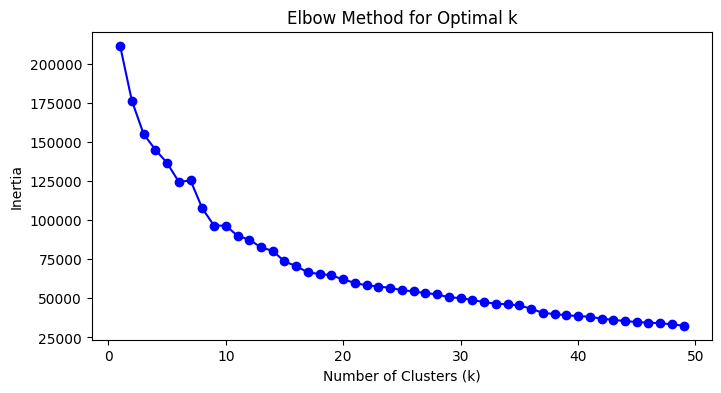

Expenditure Rank (1 = Least Costly, 10 = Most Costly):
     Cluster  Expenditure_Rank
73         1                 1
3          0                 2
61         9                 3
74         2                 4
91         5                 5
30         6                 6
46         7                 7
65         8                 8
95         4                 9
180        3                10


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Select relevant features
comorbidity_columns = [
    'High_BP_Diagnosis', 'Coronary_Hrt_Disease_Diagnosis', 'Angina_Diagnosis',
    'Heart_Attack_Diagnosis', 'Other_Heart_Disease_Diagnosis', 'Stroke_Diagnosis',
    'Emphysema_Diagnosis', 'High_Cholesterol_Diagnosis', 'Cancer_Diagnosis',
    'Arthritis_Diagnosis', 'Diabetes_Diagnosis',  'comorbidity_count'
]
features = chronic_df_imputed[comorbidity_columns + ['Total_Health_Care_Expenditure']]

# 2. Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Determine optimal number of clusters (k) using Elbow Method (optional, can be visualized)
# Sum of squared distances (inertia) for different values of k
inertias = []
K = range(1, 50)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 4. Perform K-Means Clustering
# Assuming k=10 after reviewing the Elbow plot
kmeans = KMeans(n_clusters=10, random_state=42)
chronic_df_imputed['Cluster'] = kmeans.fit_predict(features_scaled)

# 5. Calculate average expenditure per cluster and rank
cluster_costs = chronic_df_imputed.groupby('Cluster')['Total_Health_Care_Expenditure'].mean().sort_values()
rank_mapping = {cluster: rank for rank, cluster in enumerate(cluster_costs.index, 1)}
chronic_df_imputed['Expenditure_Rank'] = chronic_df_imputed['Cluster'].map(rank_mapping)

# 6. Output ranking of clusters
cluster_ranking = chronic_df_imputed[['Cluster', 'Expenditure_Rank']].drop_duplicates().sort_values('Expenditure_Rank')
print("Expenditure Rank (1 = Least Costly, 10 = Most Costly):")
print(cluster_ranking)


#7. Dropping the 'Cluster' column after creating the 'Expenditure_Rank'

chronic_df_imputed.drop('Cluster', axis=1, inplace=True)

In [ ]:
chronic_df_imputed.columns

Index(['Panel_Encrypted_DU_ID', 'Person_Number', 'Person_ID', 'Panel_Number',
       'Age', 'Year', 'Sex', 'Wage_Income', 'Family_Total_Income',
       'High_BP_Diagnosis', 'Coronary_Hrt_Disease_Diagnosis',
       'Angina_Diagnosis', 'Heart_Attack_Diagnosis',
       'Other_Heart_Disease_Diagnosis', 'Stroke_Diagnosis',
       'Emphysema_Diagnosis', 'High_Cholesterol_Diagnosis', 'Cancer_Diagnosis',
       'Arthritis_Diagnosis', 'Diabetes_Diagnosis', 'Asthma_Diagnosis',
       'Employment_Status', 'Total_Income', 'Unemployment_Imputation_Flag',
       'Unemployment_Comp_Income', 'Insurance_Coverage_Status',
       'Uninsured_Status', 'Total_Health_Care_Expenditure',
       'Total_Amt_Paid_Medicaid', 'Total_Amt_Paid_Medicare',
       'Total_Amt_Paid_Other_Federal', 'Total_Amt_Paid_Other_Sources',
       'Total_Amt_Paid_Other_Combined', 'Total_Amt_Paid_Private_Insurance',
       'Total_Amt_Paid_Private_and_Tricare', 'Total_Amt_Paid_Self_Family',
       'Total_Amt_Paid_State_Local', 'Total_H

In [ ]:
 chronic_df_imputed.head()

,Panel_Encrypted_DU_ID,Person_Number,Person_ID,Panel_Number,Age,Year,Sex,Wage_Income,Family_Total_Income,High_BP_Diagnosis,...,Total_ER_Dr_Expenditure,Total_Inpatient_Hospital_Expenditure,Total_Inpatient_Facility_Expenditure,Total_Inpatient_Doctor_Expenditure,REGION,Total_Outpatient_Expenditure,Total_ER_Expenditure,Total_Inpatient_Expenditure,comorbidity_count,Expenditure_Rank
3,2320006,102,2320006102,23,23,2021,1,16320,16320,0.0,...,0,0,0,0,3,0,0,0,1.0,2
6,2320013,101,2320013101,23,85,2021,2,0,16528,0.0,...,0,0,0,0,3,0,0,0,2.0,2
17,2320027,102,2320027102,23,32,2021,1,41600,41600,0.0,...,0,0,0,0,3,6594,0,0,1.0,2
30,2320040,101,2320040101,23,63,2021,1,40000,189000,1.0,...,0,0,0,0,3,0,0,0,5.0,6
46,2320069,101,2320069101,23,76,2021,2,35360,35360,0.0,...,0,0,0,0,3,3700,0,0,3.0,7


In [ ]:

chronic_df_imputed.isna().sum().sum()

0

In [ ]:
# Saving the file to local
med_consol_file = chronic_df_imputed

# Specify the Google Drive path
#save_path_hip = '/content/drive/Shareddrives/Data240_Group_Project/Data/2022_2021 Consolidated_File_Section1/Merged_all_v2.csv'
save_path = '/content/drive/Shareddrives/Data240_Group_Project/Data/Merged Cleaned Data/Merged_all_v2.csv'
# Save the dataframe to the specified path
med_consol_file.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")


File saved to: /content/drive/Shareddrives/Data240_Group_Project/Data/Merged Cleaned Data/Merged_all_v2.csv


In [ ]:
## We will check the correlation between numeric variables

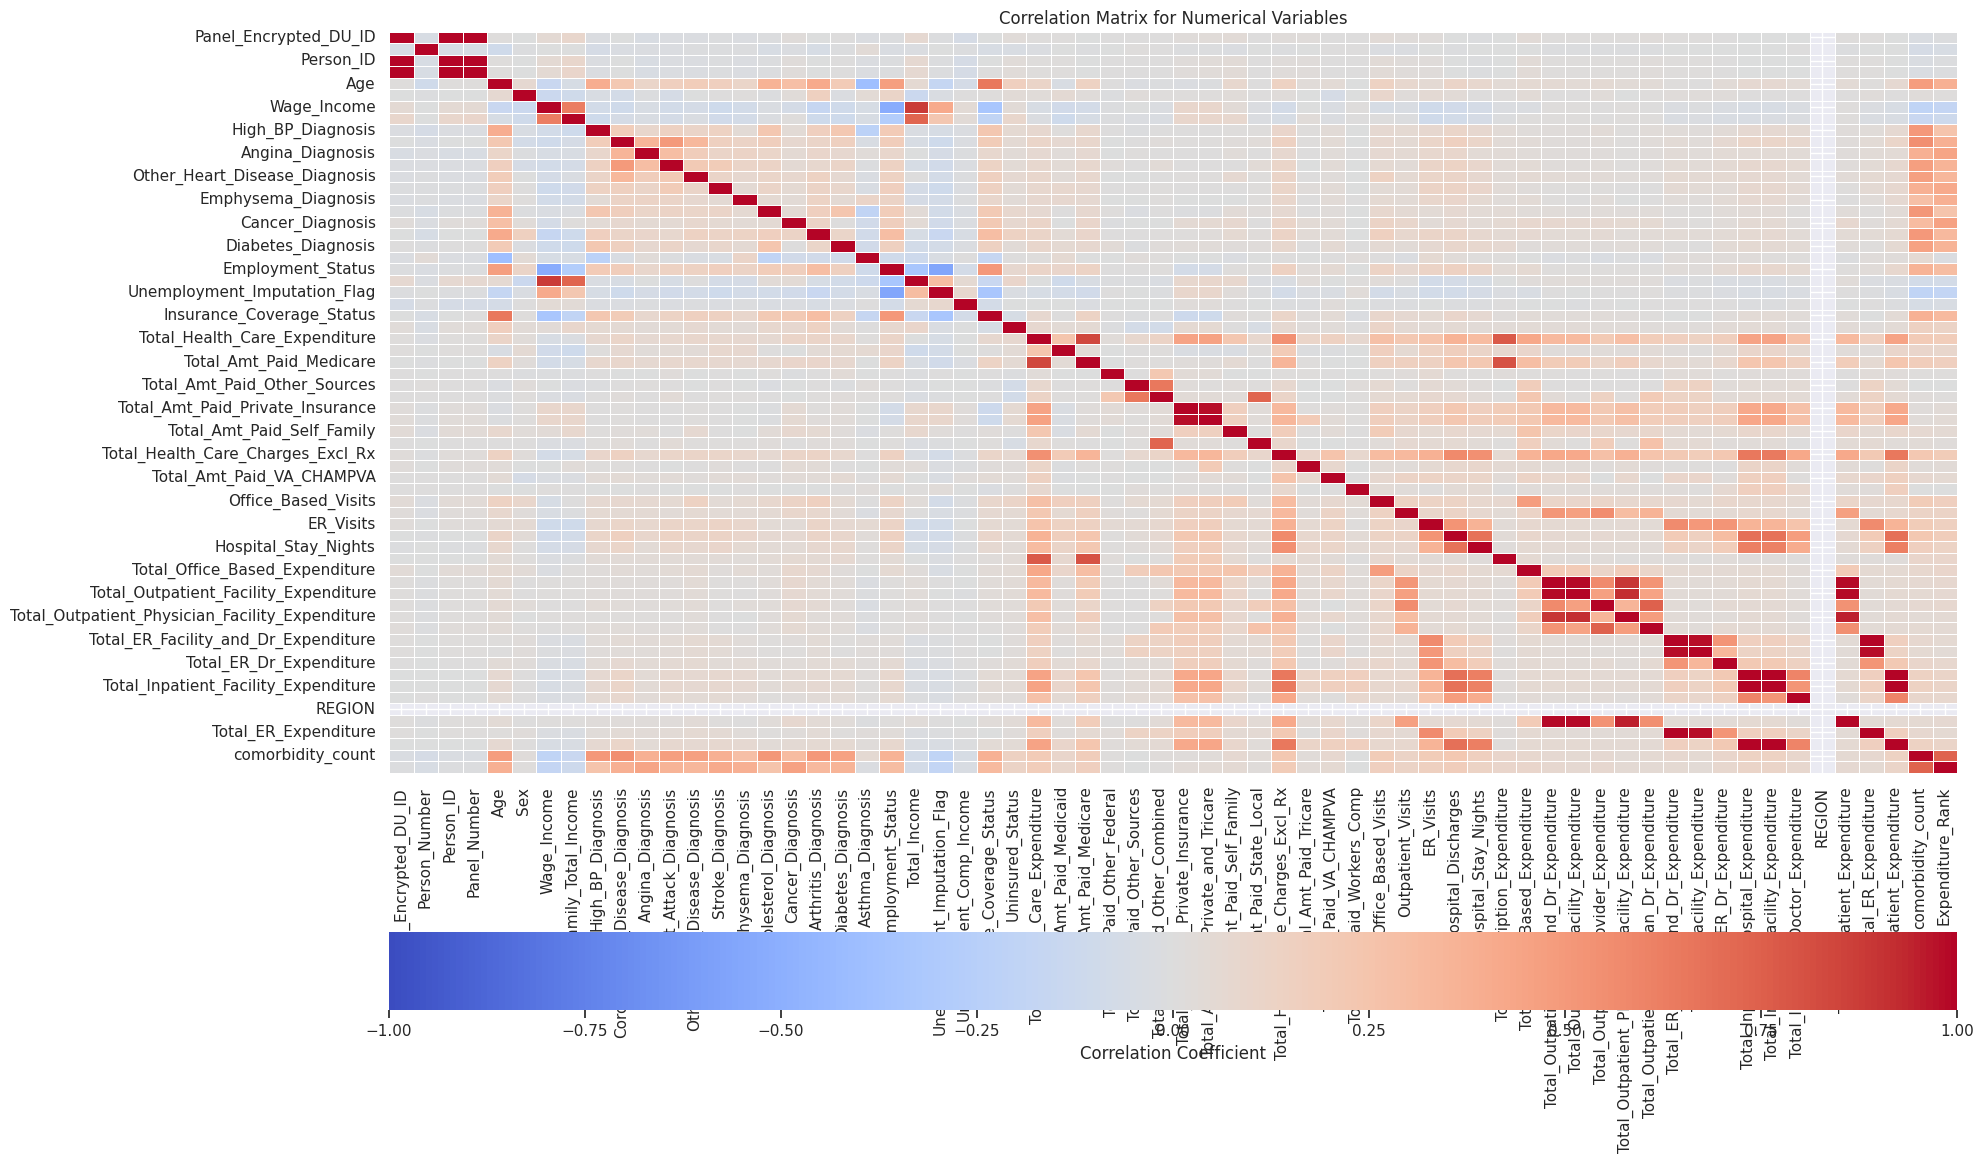

In [ ]:
# Filter only numeric variables
numeric_df = chronic_df_imputed.select_dtypes(include='number')
numeric_df.head()
# Calculate the correlation matrix
corr = numeric_df.corr()

# Print rounded correlation matrix
#print(round(corr, 2))

# Set the theme for the plot
sns.set_theme()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(20, 12))
ax = sns.heatmap(corr, annot=False, fmt=".1f", cmap='coolwarm', linewidth=.5,
                 vmin=-1.0, vmax=1.0, cbar_kws={"label": "Correlation Coefficient", "location": "bottom"})

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()

# Add title to the plot
plt.title('Correlation Matrix for Numerical Variables')

# Show the plot
plt.show()

In [ ]:

#!pip install ace_tools

In [ ]:
chronic_df_imputed.head(3)

,Panel_Encrypted_DU_ID,Person_Number,Person_ID,Panel_Number,Age,Year,Sex,Wage_Income,Family_Total_Income,High_BP_Diagnosis,...,Total_ER_Dr_Expenditure,Total_Inpatient_Hospital_Expenditure,Total_Inpatient_Facility_Expenditure,Total_Inpatient_Doctor_Expenditure,REGION,Total_Outpatient_Expenditure,Total_ER_Expenditure,Total_Inpatient_Expenditure,comorbidity_count,Expenditure_Rank
3,2320006,102,2320006102,23,23,2021,1,16320,16320,0.0,...,0,0,0,0,3,0,0,0,1.0,2
6,2320013,101,2320013101,23,85,2021,2,0,16528,0.0,...,0,0,0,0,3,455,0,0,2.0,2
17,2320027,102,2320027102,23,32,2021,1,41600,41600,0.0,...,0,0,0,0,3,5489,1266,0,1.0,2


In [ ]:

# Select only numeric columns
numeric_df = chronic_df_imputed.select_dtypes(include='number')
#numeric_df=numeric_df.drop(['Panel_Encrypted_DU_ID','Person_Number','Person_ID','REGION'],axis=1,inplace=True)
numeric_df
# Calculate the correlation matrix
corr = numeric_df.corr()

# Apply filter to keep correlations > 0.5 or < -0.3
filtered_corr = corr[(corr > 0.5) | (corr < -0.3)]

# Extract pairs with correlation greater than 0.5 or less than -0.3
filtered_pairs = filtered_corr.stack().reset_index()
filtered_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
filtered_pairs = filtered_pairs[(filtered_pairs['Correlation'] > 0.5) | (filtered_pairs['Correlation'] < -0.3)]
filtered_pairs = filtered_pairs[filtered_pairs['Feature_1'] != filtered_pairs['Feature_2']]

# Display the filtered pairs
#i#mport ace_tools as tools
#tools.display_dataframe_to_user(name="Filtered Feature Correlations", dataframe=filtered_pairs)
filtered_pairs

,Feature_1,Feature_2,Correlation
1,Panel_Encrypted_DU_ID,Person_ID,1.000000
2,Panel_Encrypted_DU_ID,Panel_Number,0.998147
4,Person_ID,Panel_Encrypted_DU_ID,1.000000
6,Person_ID,Panel_Number,0.998147
7,Panel_Number,Panel_Encrypted_DU_ID,0.998147
...,...,...,...
190,comorbidity_count,Coronary_Hrt_Disease_Diagnosis,0.548082
191,comorbidity_count,High_Cholesterol_Diagnosis,0.515289
192,comorbidity_count,Arthritis_Diagnosis,0.502266
194,comorbidity_count,Expenditure_Rank,0.740404


In [ ]:
# Extract unique pairs with correlation greater than 0.5 or less than -0.3, excluding self-correlations
filtered_pairs = filtered_corr.stack().reset_index()
filtered_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
filtered_pairs = filtered_pairs[(filtered_pairs['Correlation'] > 0.5) | (filtered_pairs['Correlation'] < -0.3)]
filtered_pairs = filtered_pairs[filtered_pairs['Feature_1'] != filtered_pairs['Feature_2']]

# Sorting and filtering unique pairs by setting each pair in alphabetical order and removing duplicates
filtered_pairs['Sorted_Pair'] = filtered_pairs.apply(lambda row: tuple(sorted([row['Feature_1'], row['Feature_2']])), axis=1)
unique_pairs = filtered_pairs.drop_duplicates(subset='Sorted_Pair').drop(columns='Sorted_Pair')

# Displaying the unique pairs to the user
#import ace_tools as tools;
#tools.display_dataframe_to_user(name="Unique Filtered Feature Correlations", dataframe=unique_pairs)

unique_pairs

,Feature_1,Feature_2,Correlation
1,Panel_Encrypted_DU_ID,Person_ID,1.000000
2,Panel_Encrypted_DU_ID,Panel_Number,0.998147
6,Person_ID,Panel_Number,0.998147
11,Age,Asthma_Diagnosis,-0.395784
12,Age,Insurance_Coverage_Status,0.655666
...,...,...,...
159,Total_Inpatient_Hospital_Expenditure,Total_Inpatient_Expenditure,1.000000
165,Total_Inpatient_Facility_Expenditure,Total_Inpatient_Doctor_Expenditure,0.519008
166,Total_Inpatient_Facility_Expenditure,Total_Inpatient_Expenditure,0.995330
170,Total_Inpatient_Doctor_Expenditure,Total_Inpatient_Expenditure,0.599099


from matplotlib import pyplot as plt
unique_pairs['Correlation'].plot(kind='hist', bins=20, title='Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
unique_pairs['Correlation'].plot(kind='line', figsize=(8, 4), title='Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

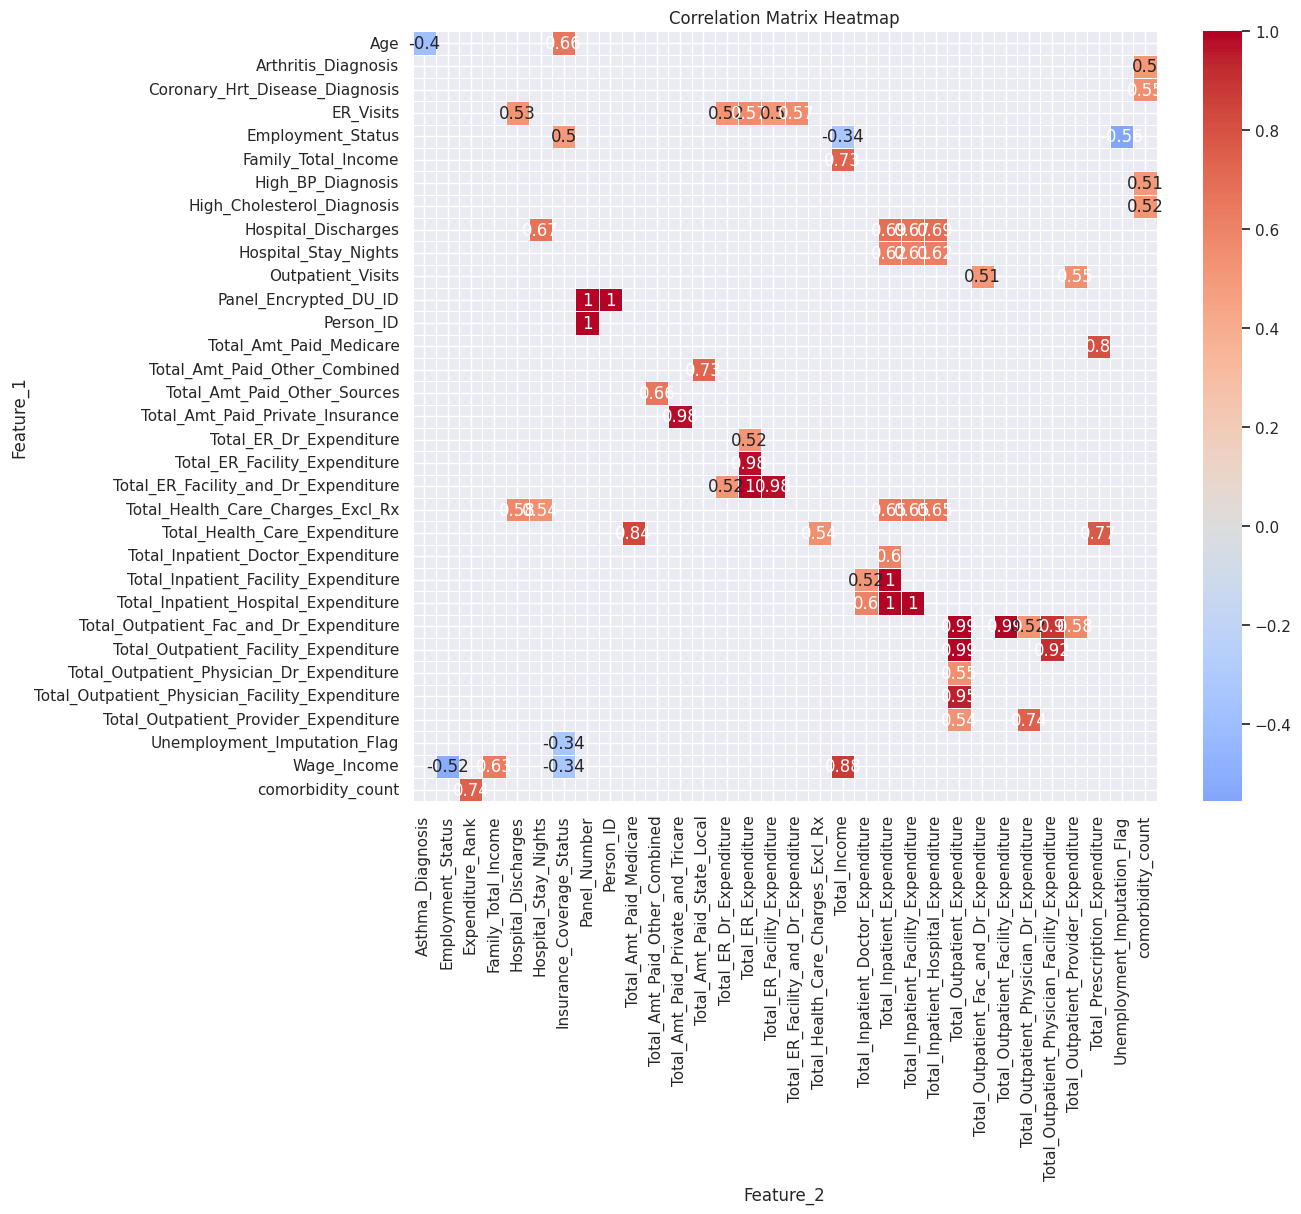

In [ ]:
# Pivoting DataFrame to a wide format suitable for heatmap plotting
correlation_matrix = unique_pairs.pivot(index='Feature_1', columns='Feature_2', values='Correlation')

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


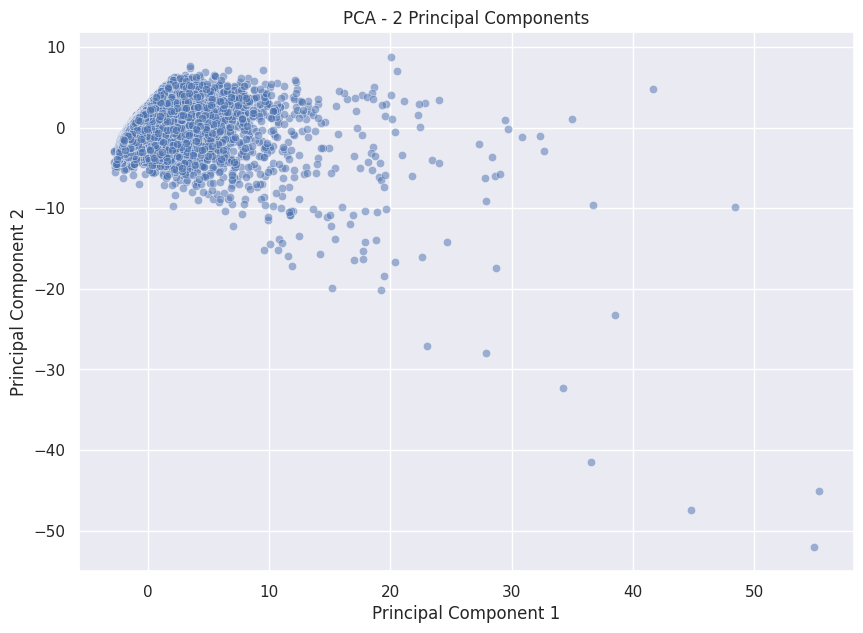

Explained variance by the first 2 components: [1.30378480e-01 7.89283684e-02 6.95437584e-02 4.99705438e-02
 4.88626842e-02 4.27065142e-02 3.59102310e-02 3.25983289e-02
 2.91735074e-02 2.51314163e-02 2.40442391e-02 2.10869612e-02
 1.94846886e-02 1.82298308e-02 1.75752127e-02 1.66674763e-02
 1.62764990e-02 1.61201946e-02 1.57764162e-02 1.55854818e-02
 1.55396209e-02 1.52312795e-02 1.46771915e-02 1.45133262e-02
 1.42467939e-02 1.39396246e-02 1.34540596e-02 1.33523466e-02
 1.25086248e-02 1.22854786e-02 1.19298757e-02 1.14531052e-02
 1.14068315e-02 1.11050434e-02 9.66931505e-03 9.50355585e-03
 9.33289403e-03 8.34206953e-03 7.67481873e-03 7.45234235e-03
 6.42755765e-03 6.26327666e-03 5.24970421e-03 4.15086882e-03
 3.83920732e-03 3.52522082e-03 3.32896550e-03 2.86508855e-03
 1.23824504e-03 9.78383126e-04 4.25444928e-04 3.90065686e-05
 1.07449206e-10 8.13788724e-12 3.61443341e-12 1.44110418e-12
 3.21820475e-17 2.82110974e-17 5.88251943e-18 3.31652265e-18
 0.00000000e+00 0.00000000e+00 0.000000

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Assuming df is your original dataframe

# Step 1: Remove non-numeric columns if necessary (e.g., object type column)
df_numeric = chronic_df_imputed.select_dtypes(include=[np.number])

# Step 2: Standardize the data (mean=0, variance=1) since PCA is sensitive to scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 3: Perform PCA
pca = PCA()  # 2 components for visualization in 2D
pca_result = pca.fit_transform(df_scaled)

# Create a dataframe with the PCA results for easy plotting
pca_df =pd.DataFrame(data=pca_result[:, :2], columns=['PC1', 'PC2'])


# Step 4: Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5)
plt.title('PCA - 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Optional: Explained variance of the PCA components
print(f"Explained variance by the first 2 components: {pca.explained_variance_ratio_}")


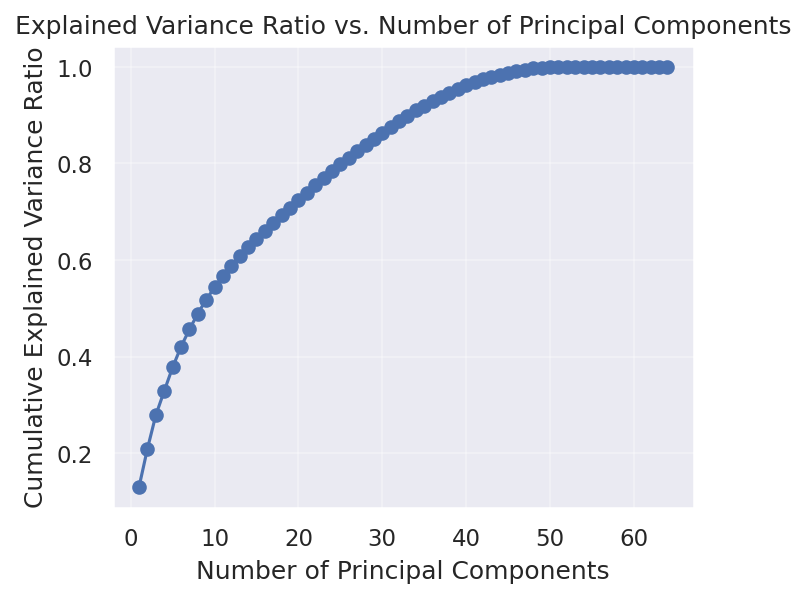

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)


plt.figure(figsize=(5,4),dpi=150)
plt.grid(alpha=0.3)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()
